# CONTEXT

With the following financial dataset, we are goint to test if we can predict if a person can be able to pay a loan depending on certain variables.

# LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# SOME EXPLORATORY DATA  ANALYSIS

Count of loans that were paid.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

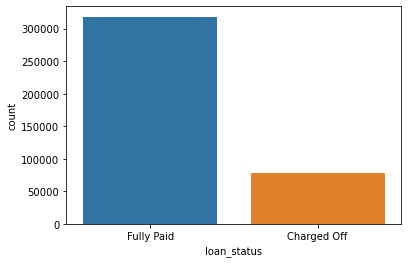

In [3]:
sns.countplot(x="loan_status", data= df)

Histogram of the ranges of loans.

<Figure size 864x720 with 0 Axes>

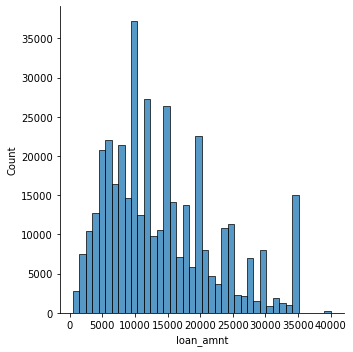

In [4]:
plt.figure(figsize=(12,10))
sns.displot(df["loan_amnt"], kde = False, bins = 40)

Correlation of all variables against all variables.

In [5]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Now with a plot.

<AxesSubplot:>

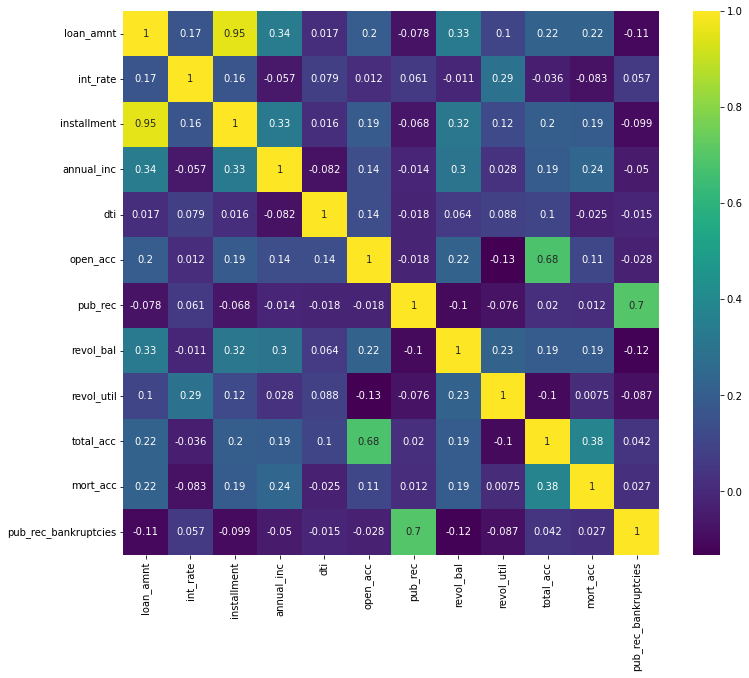

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "viridis")

We noticed a strong correlation between loan amount and the installment payment.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

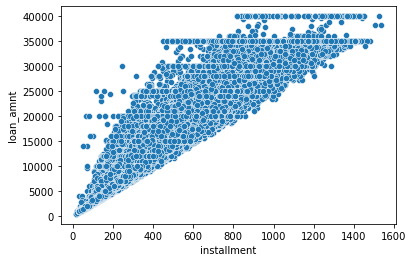

In [7]:
sns.scatterplot(x="installment", y= "loan_amnt", data = df)

A boxplot that is good to disregard the outliers.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

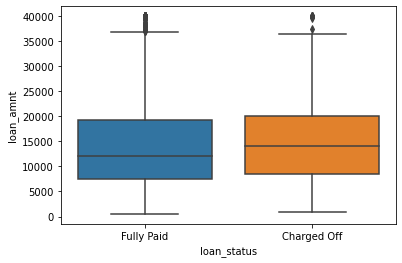

In [8]:
sns.boxplot(x="loan_status", y = "loan_amnt", data = df)

Some statistics metrics accoding to the loan status.

In [9]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [10]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [11]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

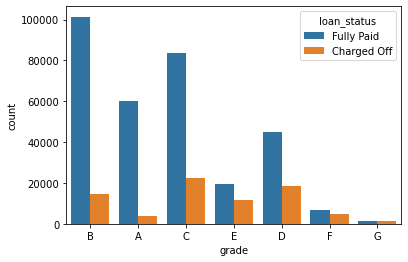

In [12]:
sns.countplot(x="grade", data = df, hue = "loan_status")

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

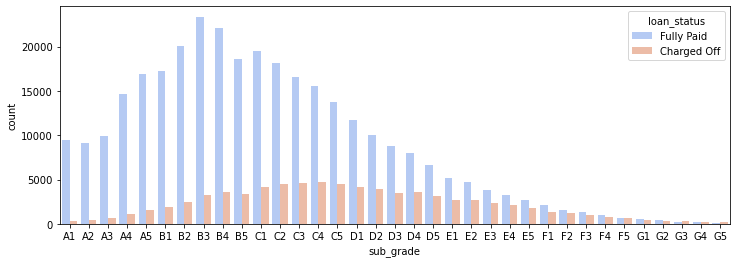

In [13]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade", data = df, order= subgrade_order, palette = "coolwarm", hue = "loan_status")

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

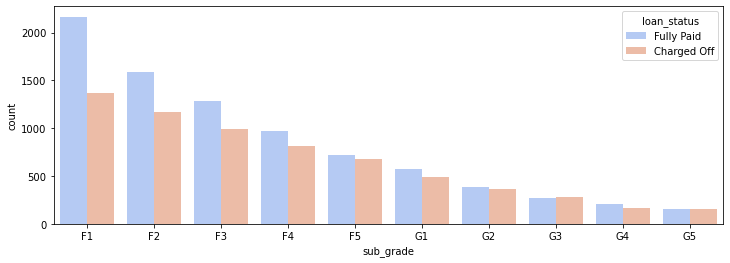

In [14]:
f_and_g = df[(df["grade"]=="G")  | (df["grade"]=="F")]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g["sub_grade"].unique())
sns.countplot(x="sub_grade", data = f_and_g, order= subgrade_order, palette = "coolwarm", hue = "loan_status")

In [15]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off":0})
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

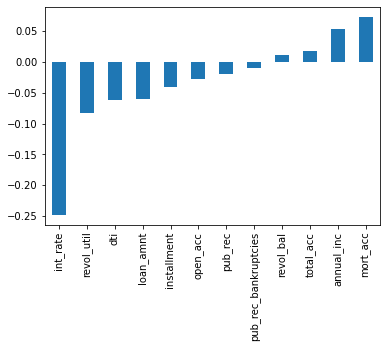

In [16]:
df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")

# CLEANING DATA PROCESS

In [18]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [19]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [20]:
df = df.drop("emp_title", axis = 1)

In [21]:
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [22]:
emp_length_order = [
    '< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
    '10+ years'
 ]
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

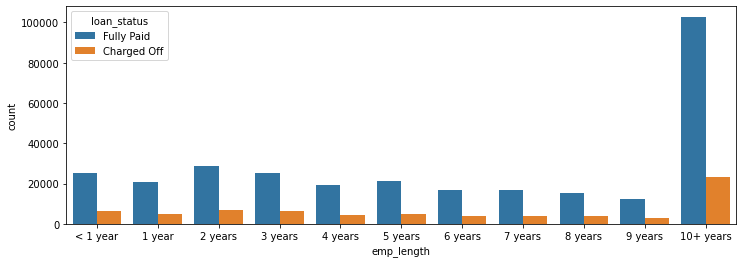

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length", data = df, order = emp_length_order, hue = "loan_status")

In [24]:
emp_co = df[df["loan_status"]== "Charged Off"].groupby("emp_length").count()["loan_status"]

In [25]:
emp_fp = df[df["loan_status"]== "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [26]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [27]:
emp_len = emp_co/(emp_co+emp_fp)
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

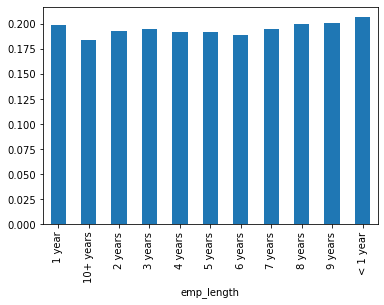

In [28]:
emp_len.plot(kind="bar")

In [29]:
df = df.drop("emp_length", axis = 1)

In [30]:
df=df.drop("title", axis= 1)

In [31]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [32]:
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [33]:
total_acc_avg = df.groupby("total_acc").mean()["mort_acc"]

In [34]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [35]:
df["most_acc"] = df.apply(lambda x: fill_mort_acc(x["total_acc"],x["mort_acc"]), axis = 1)

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
most_acc                0
dtype: int64

In [38]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [39]:
df["term"].value_counts()

 36 months    273605
 60 months     84409
Name: term, dtype: int64

In [40]:
df["term"] = df["term"].apply(lambda term: int(term[:3]))

In [41]:
df["term"].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [42]:
df = df.drop("grade", axis = 1)

In [43]:
dummies = pd.get_dummies(df["sub_grade"], drop_first = True)
df = pd.concat([df.drop("sub_grade", axis = 1), dummies], axis = 1)

In [44]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'most_acc', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5'],
      dtype='object')

In [45]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status', 'purpose' ]], drop_first = True)
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status', 'purpose' ], axis = 1), dummies], axis = 1)

In [46]:
df["home_ownership"].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [47]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [48]:
df["home_ownership"].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           66
Name: home_ownership, dtype: int64

In [49]:
dummies = pd.get_dummies(df["home_ownership"], drop_first = True)
df = pd.concat([df.drop("home_ownership", axis = 1), dummies], axis = 1)

In [50]:
df["address"]

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396024    514 Cynthia Park Apt. 402\r\nWest Williamside,...
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
Name: address, Length: 358014, dtype: object

In [51]:
df["zip_code"] = df["address"].apply(lambda address: address[-5:])

In [52]:
dummies = pd.get_dummies(df["zip_code"], drop_first = True)
df = pd.concat([df.drop("zip_code", axis = 1), dummies], axis = 1)
df = df.drop("address", axis = 1)

In [53]:
df = df.drop("issue_d", axis = 1)

In [54]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396024    Nov-1991
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
Name: earliest_cr_line, Length: 358014, dtype: object

In [55]:
df["earliest_cr_line"] = df["earliest_cr_line"].apply(lambda date: int(date[-4:]))
df["earliest_cr_line"]

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396024    1991
396025    2004
396026    2006
396027    1997
396028    1990
Name: earliest_cr_line, Length: 358014, dtype: int64

# PREPROCESSING THE DATA

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
df = df.drop("loan_status", axis = 1)

In [58]:
X = df.drop("loan_repaid", axis = 1).values

In [59]:
y = df["loan_repaid"].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101) 

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

# CREATING THE MODEL

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
X_train.shape

(286411, 79)

In [66]:
model = Sequential()

model.add(Dense(79, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(40, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(20, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [67]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data = (X_test, y_test))

Epoch 1/25
1119/1119 [==============================] - 13s 9ms/step - loss: 0.3143 - val_loss: 0.2679
Epoch 2/25
1119/1119 [==============================] - 8s 8ms/step - loss: 0.2704 - val_loss: 0.2660
Epoch 3/25
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2675 - val_loss: 0.2655
Epoch 4/25
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2658 - val_loss: 0.2651
Epoch 5/25
1119/1119 [==============================] - 10s 9ms/step - loss: 0.2644 - val_loss: 0.2648
Epoch 6/25
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2639 - val_loss: 0.2649
Epoch 7/25
1119/1119 [==============================] - 9s 8ms/step - loss: 0.2635 - val_loss: 0.2652
Epoch 8/25
1119/1119 [==============================] - 8s 7ms/step - loss: 0.2632 - val_loss: 0.2645
Epoch 9/25
1119/1119 [==============================] - 11s 10ms/step - loss: 0.2627 - val_loss: 0.2639
Epoch 10/25
1119/1119 [==============================] - 10s 9ms/step - loss: 

In [68]:
from tensorflow.keras.models import load_model
model.save("loan_model.h5")

In [69]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

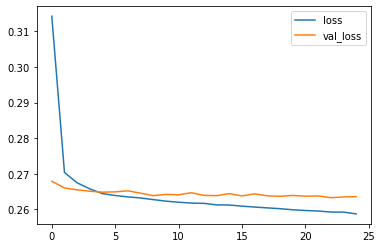

In [70]:
losses.plot()

# RESULTS

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
pre = (model.predict(X_test) > 0.5).astype('int32')

2238/2238 [==============================] - 9s 3ms/step


In [73]:
print(classification_report(y_test, pre))
print("******************************")
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     14385
           1       0.88      0.99      0.93     57218

    accuracy                           0.89     71603
   macro avg       0.92      0.72      0.77     71603
weighted avg       0.89      0.89      0.87     71603

******************************
[[ 6463  7922]
 [  289 56929]]


# TESTING WITH NEW DATA

In [74]:
import random
random.seed(101)
random_data = random.randint(0,len(df))

new_customer = df.drop("loan_repaid", axis = 1).iloc[random_data]
new_customer

loan_amnt      35000.00
term              60.00
int_rate          22.45
installment      975.64
annual_inc     94000.00
                 ...   
30723              0.00
48052              0.00
70466              1.00
86630              0.00
93700              0.00
Name: 337106, Length: 79, dtype: float64

In [75]:
new_customer = scaler.transform(new_customer.values.reshape(1,79))

In [76]:
new_customer

array([[0.87179487, 1.        , 0.66731593, 0.63088633, 0.01236842,
        0.00250025, 0.86956522, 0.1011236 , 0.        , 0.01180715,
        0.07609548, 0.16216216, 0.08823529, 0.        , 0.08823529,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [77]:
pre_new_customer = (model.predict(new_customer) > 0.5).astype('int32')

1/1 [==============================] - 0s 48ms/step


In [78]:
df.iloc[random_data]["loan_repaid"]

0.0